In [2]:
import numpy as np
import os
import seaborn as sns
import pickle
import pandas as pd
import scipy
from scipy import stats
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

In [3]:
# amended to organise by block number/ discard trials from unfinished block
# added input to sort code to select delay length and set length fo each file list
# amended to output lick times for each trial
# 231219 amended to allow changing of window to collect licks for each trial with post_O2 

def generate_mouse_dataframe(mouse_data_path, mouse, trace_analysis_start, trace_analysis_end, delay, set_length, days_list):
    df_temp = pd.DataFrame(columns=['mouse', 'day', 'trial_number', 'trial_type', 'lick_data', 'lick_times', 'go_nogo', 'outcome', 'correct', 'hit', 'miss', 'set'])

    for day in days_list:
        day_files = [f for f in sorted(listdir(mouse_data_path)) if isfile(join(mouse_data_path, f)) and mouse in f and f"day{day}" in f]

        for file_name in day_files:
            file_path = join(mouse_data_path, file_name)
            data = pd.read_csv(file_path, header=None, names=['time', 'odour_a', 'odour_b', 'odour_c', 'licks', 'water'])

        # make a generic odour trace 
        data['odour'] = data.odour_a + data.odour_b + data.odour_c
        
        #find each odour
        key = []
        trial_number = []
        licks = []
        licks_times = []
        go_nogo = []
        outcome = []
        trial_count = 0
        odour_1 = []
        odour_2 = []
        
        odour_2_licks = []
        resp_wind_licks = []
        odour_2_resp_wind_licks = []
        
        #specfify time window to take lick datas from for each trial
        post_O2 = 7000
        
     
        for x in np.where(data.odour.diff() >2)[0][0:]: #(to detect first trial)
        
            #identify of the odour

            #if odour a
            if data.odour_a[x] > 2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] > 2:
                    key.append('b->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_2.append('a') 
                    odour_1.append('b')
                     
                    
                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')  
 

                #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_2.append('a') 
                    odour_1.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')  

            #if odour b
            if data.odour_b[x] >2: 
                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('a')
                    odour_2.append('b') 

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('c')
                    odour_2.append('b') 

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')

            #if odour c
            if data.odour_c[x] >2:
            #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] >2:
                    key.append('b->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('b')
                    odour_2.append('c') 

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('a')
                    odour_2.append('b') 

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')
                    
            
        data_temp = pd.DataFrame() 
        data_temp['mouse'] = np.repeat(mouse, len(key))
        data_temp['day'] = np.repeat(day, len(key))
        data_temp['trial_number'] = trial_number
        data_temp['trial_type'] = key
        data_temp['lick_data'] = licks
        data_temp['lick_times'] = licks_times
        data_temp['go_nogo'] = go_nogo
        data_temp['outcome'] = outcome
        data_temp['correct'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0) + np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['hit'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0)
        data_temp['correct_rejection'] = np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['miss'] = np.where(data_temp.outcome == 'miss', 1.0, 0.0)
        data_temp['false_positive'] = np.where(data_temp.outcome == 'false_positive', 1.0, 0.0)
        data_temp['odour_1'] = odour_1
        data_temp['odour_2'] = odour_2
        
        #data_temp.drop([0, 1, 2, 3, 4], inplace=True)
        # if first trial not recognised, remove other trials from first block
        data_temp.index = pd.RangeIndex(len(data_temp.index))
        # reset index
            
        block_length = 6
        
        odour_block = np.repeat(np.arange(len(data_temp)//block_length), block_length)
        
          # if there is not a number of trials divisible by 6
        if len(odour_block) != len(data_temp):
            # make a list of the last set number, the length required
            temp_block = np.ones(len(data_temp) - len(odour_block)) * -1
            odour_block = odour_block.tolist() + temp_block.tolist()
            
            data_temp['block'] = odour_block
            
            index_extra_trial = data_temp[ data_temp['block'] == -1 ].index
            data_temp.drop(index_extra_trial , inplace=True)
            #removes final trials in unfinished block
        elif len(odour_block) == len(data_temp):
            data_temp['block'] = odour_block
        
        odour_set = np.repeat(np.arange(len(data_temp)//set_length), set_length)

        # if there is not a number of trials divisible by 6
        if len(odour_set) != len(data_temp):
            # make a list of the last set number, the length required
            temp = np.ones(len(data_temp) - len(odour_set)) * odour_set[-1]
            odour_set = odour_set.tolist() + temp.tolist()
        data_temp['set'] = odour_set
        
        df_temp = pd.concat([df_temp, data_temp])
        
    return df_temp


In [29]:
def plot_behavior_metrics(task_data):
    # Check if 'mouse' and 'day' columns exist
    if 'mouse' not in task_data.columns or 'day' not in task_data.columns:
        raise ValueError("DataFrame must contain 'mouse' and 'day' columns.")

    # Ensure only numeric columns are included for mean calculation, plus 'mouse' and 'day' for grouping
    numeric_cols = task_data.select_dtypes(include=['number']).columns.tolist()
    groupby_cols = ['mouse', 'day']
    cols_to_use = list(set(numeric_cols + groupby_cols))
    mean_data = task_data[cols_to_use].groupby(groupby_cols).mean().reset_index()

    sns.set_palette("Dark2")
    plt.figure(figsize=(18, 6))

    # Plot Correct Rate
    plt.subplot(1, 3, 1)
    sns.pointplot(data=mean_data, x='day', y='correct', hue='mouse')
    plt.title('Correct Rate Over Training Days')
    plt.axhline(y=0.5, c='k', linestyle='--')
    plt.axhline(y=0.7, c='0.5', linestyle='--')
    plt.axhline(y=0.8, c='0.5', linestyle='--')
    plt.ylim(0, 1)
    plt.ylabel('Correct Rate (%)')
    plt.xlabel('Training Day')
    plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 25, 50, 75, 100])

    # Plot Hit Rate
    plt.subplot(1, 3, 2)
    sns.pointplot(data=mean_data, x='day', y='hit', hue='mouse')
    plt.title('Hit Rate Over Training Days')
    plt.axhline(y=0.25, c='k', linestyle='--')
    plt.axhline(y=0.35, c='0.5', linestyle='--')
    plt.axhline(y=0.4, c='0.5', linestyle='--')
    plt.ylim(0, 0.5)
    plt.ylabel('Hit Rate (%)')
    plt.xlabel('Training Day')
    plt.yticks([0, 0.125, 0.25, 0.375, 0.5], [0, 12.5, 25, 37.5, 50])

    # Plot Correct Rejection Rate
    plt.subplot(1, 3, 3)
    sns.pointplot(data=mean_data, x='day', y='correct_rejection', hue='mouse')
    plt.title('Correct Rejection Rate Over Training Days')
    plt.axhline(y=0.25, c='k', linestyle='--')
    plt.axhline(y=0.35, c='0.5', linestyle='--')
    plt.axhline(y=0.4, c='0.5', linestyle='--')
    plt.ylim(0, 0.5)
    plt.ylabel('Correct Rejection Rate (%)')
    plt.xlabel('Training Day')
    plt.yticks([0, 0.125, 0.25, 0.375, 0.5], [0, 12.5, 25, 37.5, 50])

    sns.despine()
    plt.tight_layout()
    plt.show()


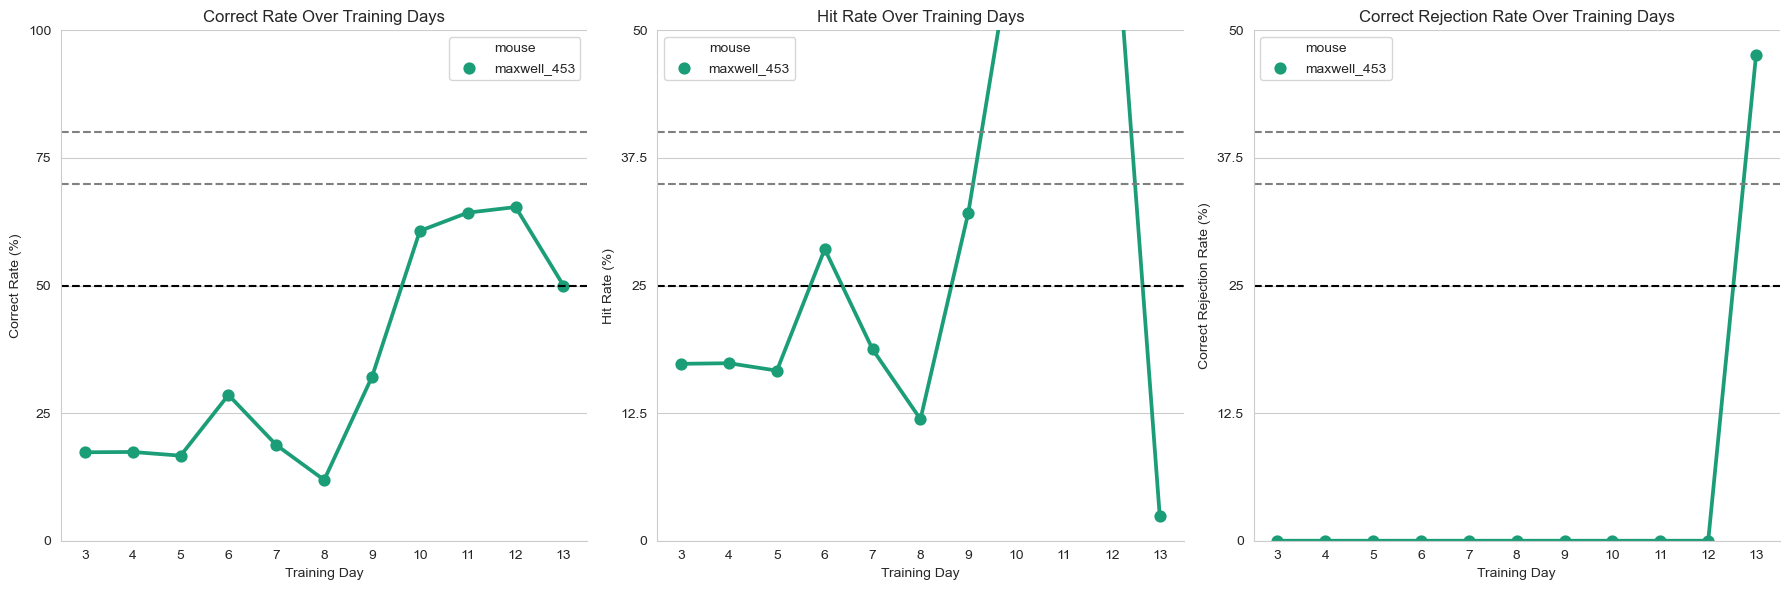

In [32]:

plot_behavior_metrics(df_maxwell_453)

In [21]:
df_maxwell_452

,mouse,day,trial_number,trial_type,lick_data,lick_times,go_nogo,outcome,correct,hit,miss,set,correct_rejection,false_positive,odour_1,odour_2,block
0,maxwell_452,3,0,b->c,"[0.000986, 0.000986, 0.000986, 0.000986, 0.000...","[11822, 11823, 11824, 11825, 11826, 11827, 118...",go,miss,0.0,0.0,1.0,0.0,0.0,0.0,b,c,0.0
1,maxwell_452,3,1,c->a,"[0.000986, 0.002279, 0.000986, 0.000986, 0.000...","[1114, 1115, 1116, 1117, 1118, 1119, 1120, 112...",go,miss,0.0,0.0,1.0,0.0,0.0,0.0,c,a,0.0
2,maxwell_452,3,2,a->b,"[0.000986, 0.002279, 0.000986, 0.000986, 0.000...","[1045, 1046, 1047, 1048, 1049, 1050, 1051, 105...",go,miss,0.0,0.0,1.0,0.0,0.0,0.0,a,b,0.0
3,maxwell_452,3,3,c->a,"[0.000986, 0.000986, -0.000307, 0.002279, 0.00...",[],go,miss,0.0,0.0,1.0,0.0,0.0,0.0,c,a,0.0
4,maxwell_452,3,4,a->b,"[0.000986, 0.002279, 0.002279, 0.000986, 0.000...","[2969, 2970, 2971, 2972, 2973, 2974, 2975, 297...",go,miss,0.0,0.0,1.0,0.0,0.0,0.0,a,b,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,maxwell_452,13,73,b->c,"[-0.017111, -0.017111, -0.017111, -0.015818, -...","[3145, 3146, 3147, 3148, 3149, 3150, 3151, 315...",go,miss,0.0,0.0,1.0,6.0,0.0,0.0,b,c,12.0
74,maxwell_452,13,74,a->b,"[-0.017111, -0.015818, -0.015818, -0.015818, -...","[11618, 11619, 11620, 11621, 11622, 11623, 116...",go,miss,0.0,0.0,1.0,6.0,0.0,0.0,a,b,12.0
75,maxwell_452,13,75,c->a,"[-0.015818, -0.015818, -0.015818, -0.017111, -...","[9122, 9123, 9124, 9125, 9126, 9127, 9128, 912...",go,hit,1.0,1.0,0.0,6.0,0.0,0.0,c,a,12.0
76,maxwell_452,13,76,a->b,"[-0.017111, -0.017111, -0.014525, -0.015818, -...","[11663, 11664, 11665, 11666, 11667, 11668, 116...",go,miss,0.0,0.0,1.0,6.0,0.0,0.0,a,b,12.0


In [5]:
behaviour_directory = "/Users/chenx/Desktop/MacAskill Lab/Data/My_Rig_Data/Behaviour"
mouse_ids = ['maxwell_452', 'maxwell_453', 'maxwell_454']
days_to_process = np.arange(3,14)

data_frames = {}  # Initialize an empty dictionary to store the DataFrames

# Loop through each mouse ID and process the data
for mouse_id in mouse_ids:
    df_mouse = generate_mouse_dataframe(behaviour_directory, mouse_id, 1500, 2450, 5000, 10, days_to_process)
    data_frames[mouse_id] = df_mouse  # Store the DataFrame in the dictionary keyed by mouse ID

# Now you can access each mouse's DataFrame from the dictionary
df_maxwell_452 = data_frames['maxwell_452']
df_maxwell_453 = data_frames['maxwell_453']
df_maxwell_454 = data_frames['maxwell_454']

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_lick_raster(task_data, day, delay=5000, offset=2):
    """
    Plots lick times on each trial (rows) separated by go trials (bottom) and no-go trials (top) for a specific day.

    Parameters:
    - task_data: DataFrame containing the task data for a specific mouse.
    - day: Integer, the day of session to plot.
    - delay: Integer, delay time in milliseconds.
    - offset: Integer, sets spacing between trial rasters.
    """

    temp_data = task_data[task_data.day == day]
    if not temp_data.empty:
        mouse_id = temp_data['mouse'].iloc[0]  # Assuming all entries have the same mouse ID
    else:
        mouse_id = "Unknown Mouse"  # Fallback in case the DataFrame is empty

    plot_height = len(temp_data) * offset

    lick_times_go = temp_data[temp_data.go_nogo == 'go']['lick_times']
    lick_times_nogo = temp_data[temp_data.go_nogo == 'no_go']['lick_times']
    lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

    plt.figure(dpi=100, figsize=(10, 6))
    plt.eventplot(lick_times_go_nogo, linewidths=1, lineoffsets=2, colors='g')
    plt.xlim(0, delay + 10000)

    # Adding informative labels and title with dynamic mouse ID
    plt.xlabel('Time (s)')
    plt.ylabel('Trial Number')
    plt.title(f'Mouse {mouse_id} Lick Times for Day {day}')

    # Adding color-coded regions to the plot with labels outside the plot
    water_template = np.zeros(delay + 10000)
    water_template[delay + 6500:delay + 6650] = plot_height
    plt.fill_between(range(len(water_template)), water_template, color='skyblue', step='pre', label='Water Reward Window')

    go_nogo_template = np.zeros(delay + 10000)
    go_nogo_template[delay + 5500:delay + 6450] = plot_height
    plt.fill_between(range(len(go_nogo_template)), go_nogo_template, color='yellow', step='pre', label='Go/No-Go Decision Window')

    odour_template = np.zeros(delay + 10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay + 4000:delay + 5000] = plot_height
    plt.fill_between(range(len(odour_template)), odour_template, color='0.8', step='pre', label='Odour Presentation')

    plt.yticks([0, len(lick_times_go) * offset, len(temp_data) * offset], ['0', f'Go Trials: {len(lick_times_go)}', f'Total Trials: {len(temp_data)}'])
    plt.xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000], ['2', '4', '6', '8', '10', '12', '14'])
    plt.axhline(y=len(lick_times_go) * offset, c='k', linestyle='--', label='Go/No-Go Boundary')

    # Placing the legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


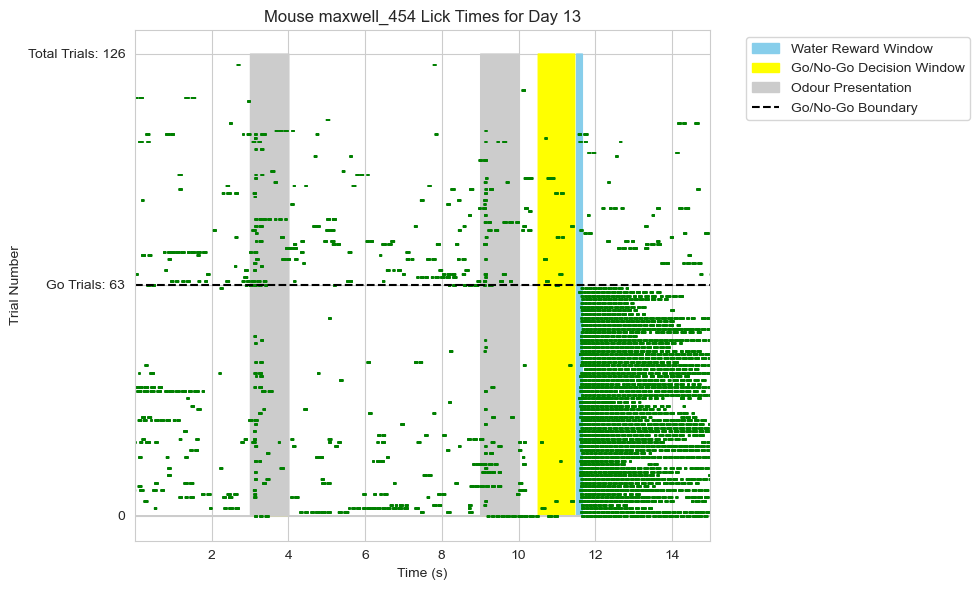

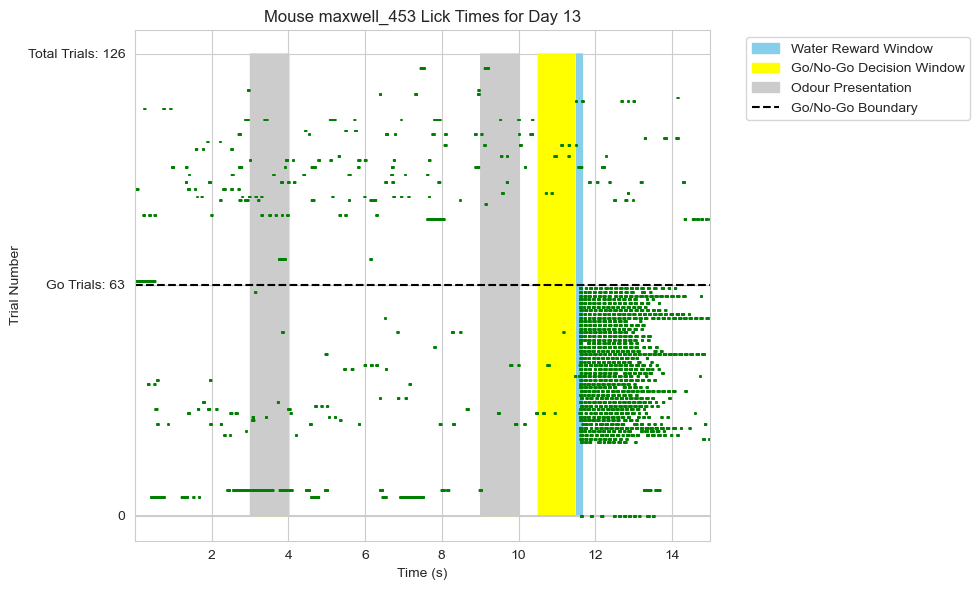

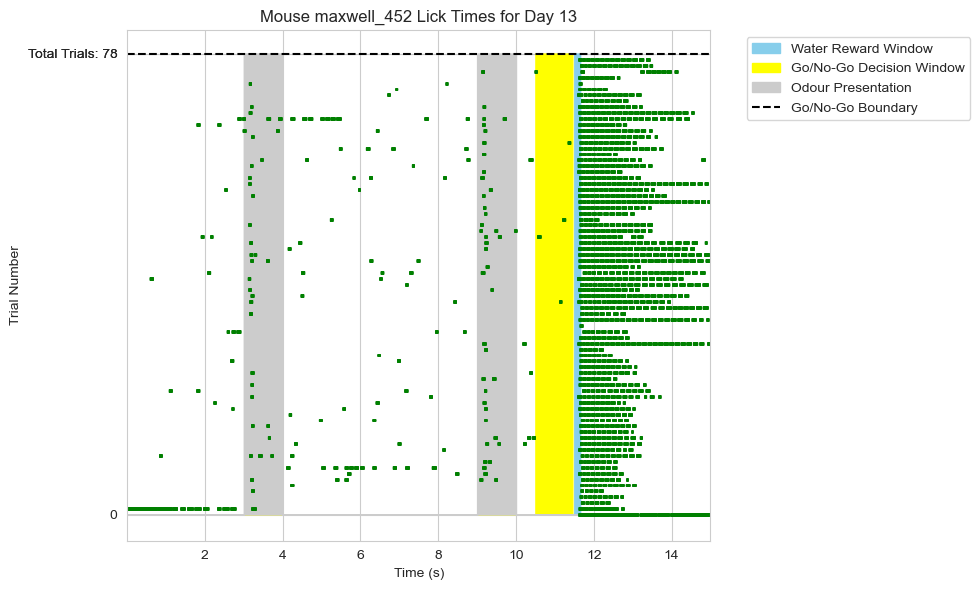

In [15]:
plot_lick_raster(df_maxwell_454, day=13)
plot_lick_raster(df_maxwell_453, day=13)
plot_lick_raster(df_maxwell_452, day=13)

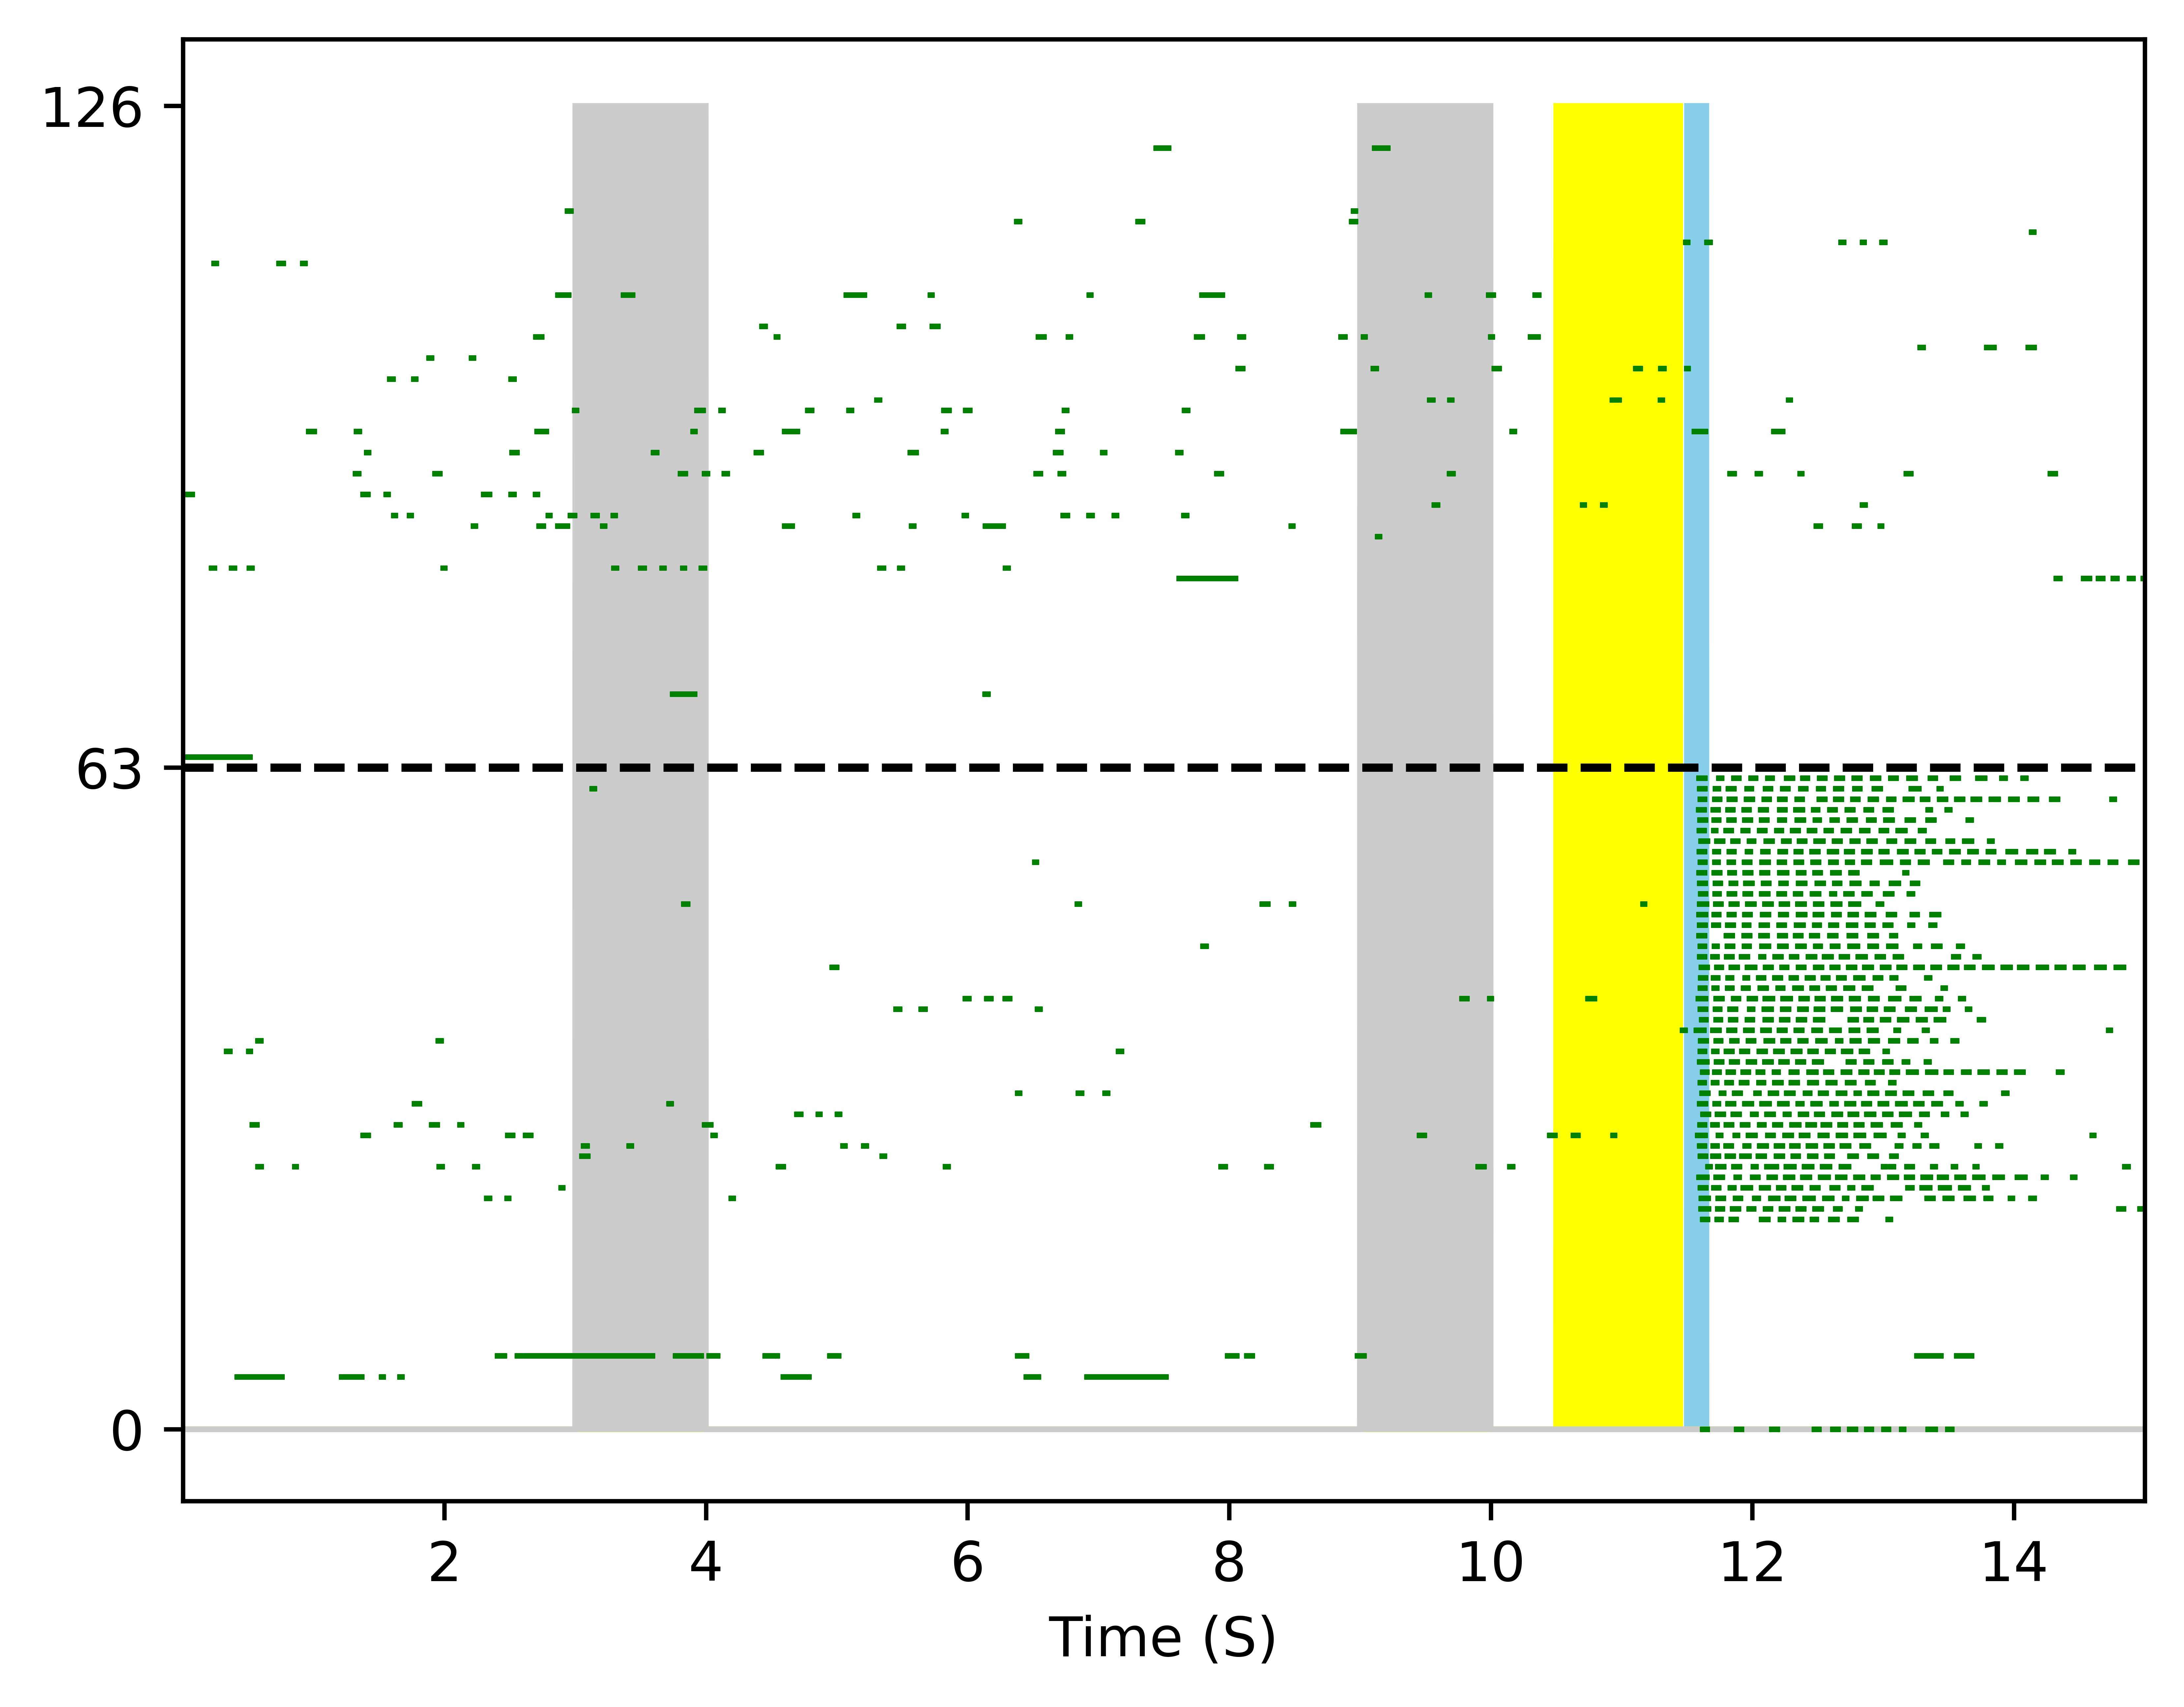

In [30]:
# Lick raster plot for mouse+day session
# plots lick times on each trial (rows) seperated by go trials (bottom) and no-go trials (top)

mouse = '453'
day = 1
delay = 5000

# offset sets spacing between trial rasters
offset = 2

temp_data = task_data[(task_data.mouse == mouse)&(task_data.day == day)]

plot_height = len(temp_data)*offset

lick_times_go = (temp_data[(temp_data.go_nogo == 'go')])['lick_times']
lick_times_nogo = (temp_data[(temp_data.go_nogo == 'no_go')])['lick_times']
lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

plt.figure(dpi=100)
plt.eventplot(lick_times_go_nogo,linewidths=1,lineoffsets=2,colors='g')
plt.xlim(0,delay+10000)
#plt.xlim(delay+6500,delay+7450)

water_template = np.zeros(delay+10000)
#water_template[delay+7500:delay+7650:] = plt.ylim()[
water_template[delay+6500:delay+6650] = plot_height
plt.fill(water_template, color = 'skyblue')

go_nogo_template = np.zeros(delay+10000)
#go_nogo_template[delay+6500:delay+7450] = plt.ylim()[1]
go_nogo_template[delay+5500:delay+6450] = plot_height
plt.fill(go_nogo_template, color = 'yellow')

odour_template = np.zeros(delay+10000)
#odour_template[4000:5000] = plt.ylim()[1]
odour_template[3000:4000] = plot_height
#odour_template[delay+5000:delay+6000] = plt.ylim()[1]
odour_template[delay+4000:delay+5000] = plot_height
plt.fill(odour_template, color = '0.8')

plt.yticks([0, len(lick_times_go)*offset ,len(temp_data)*offset],[0, len(lick_times_go), len(temp_data)]);
plt.xticks([2000,4000,6000,8000,10000,12000,14000],[2,4,6,8,10,12,14]);
plt.axhline(y = len(lick_times_go)*offset, c = 'k', linestyle = '--')
plt.xlabel('Time (S)');
#plt.savefig('example_expert_raster_DO3_day6.pdf', bbox_inches='tight')
plt.show()

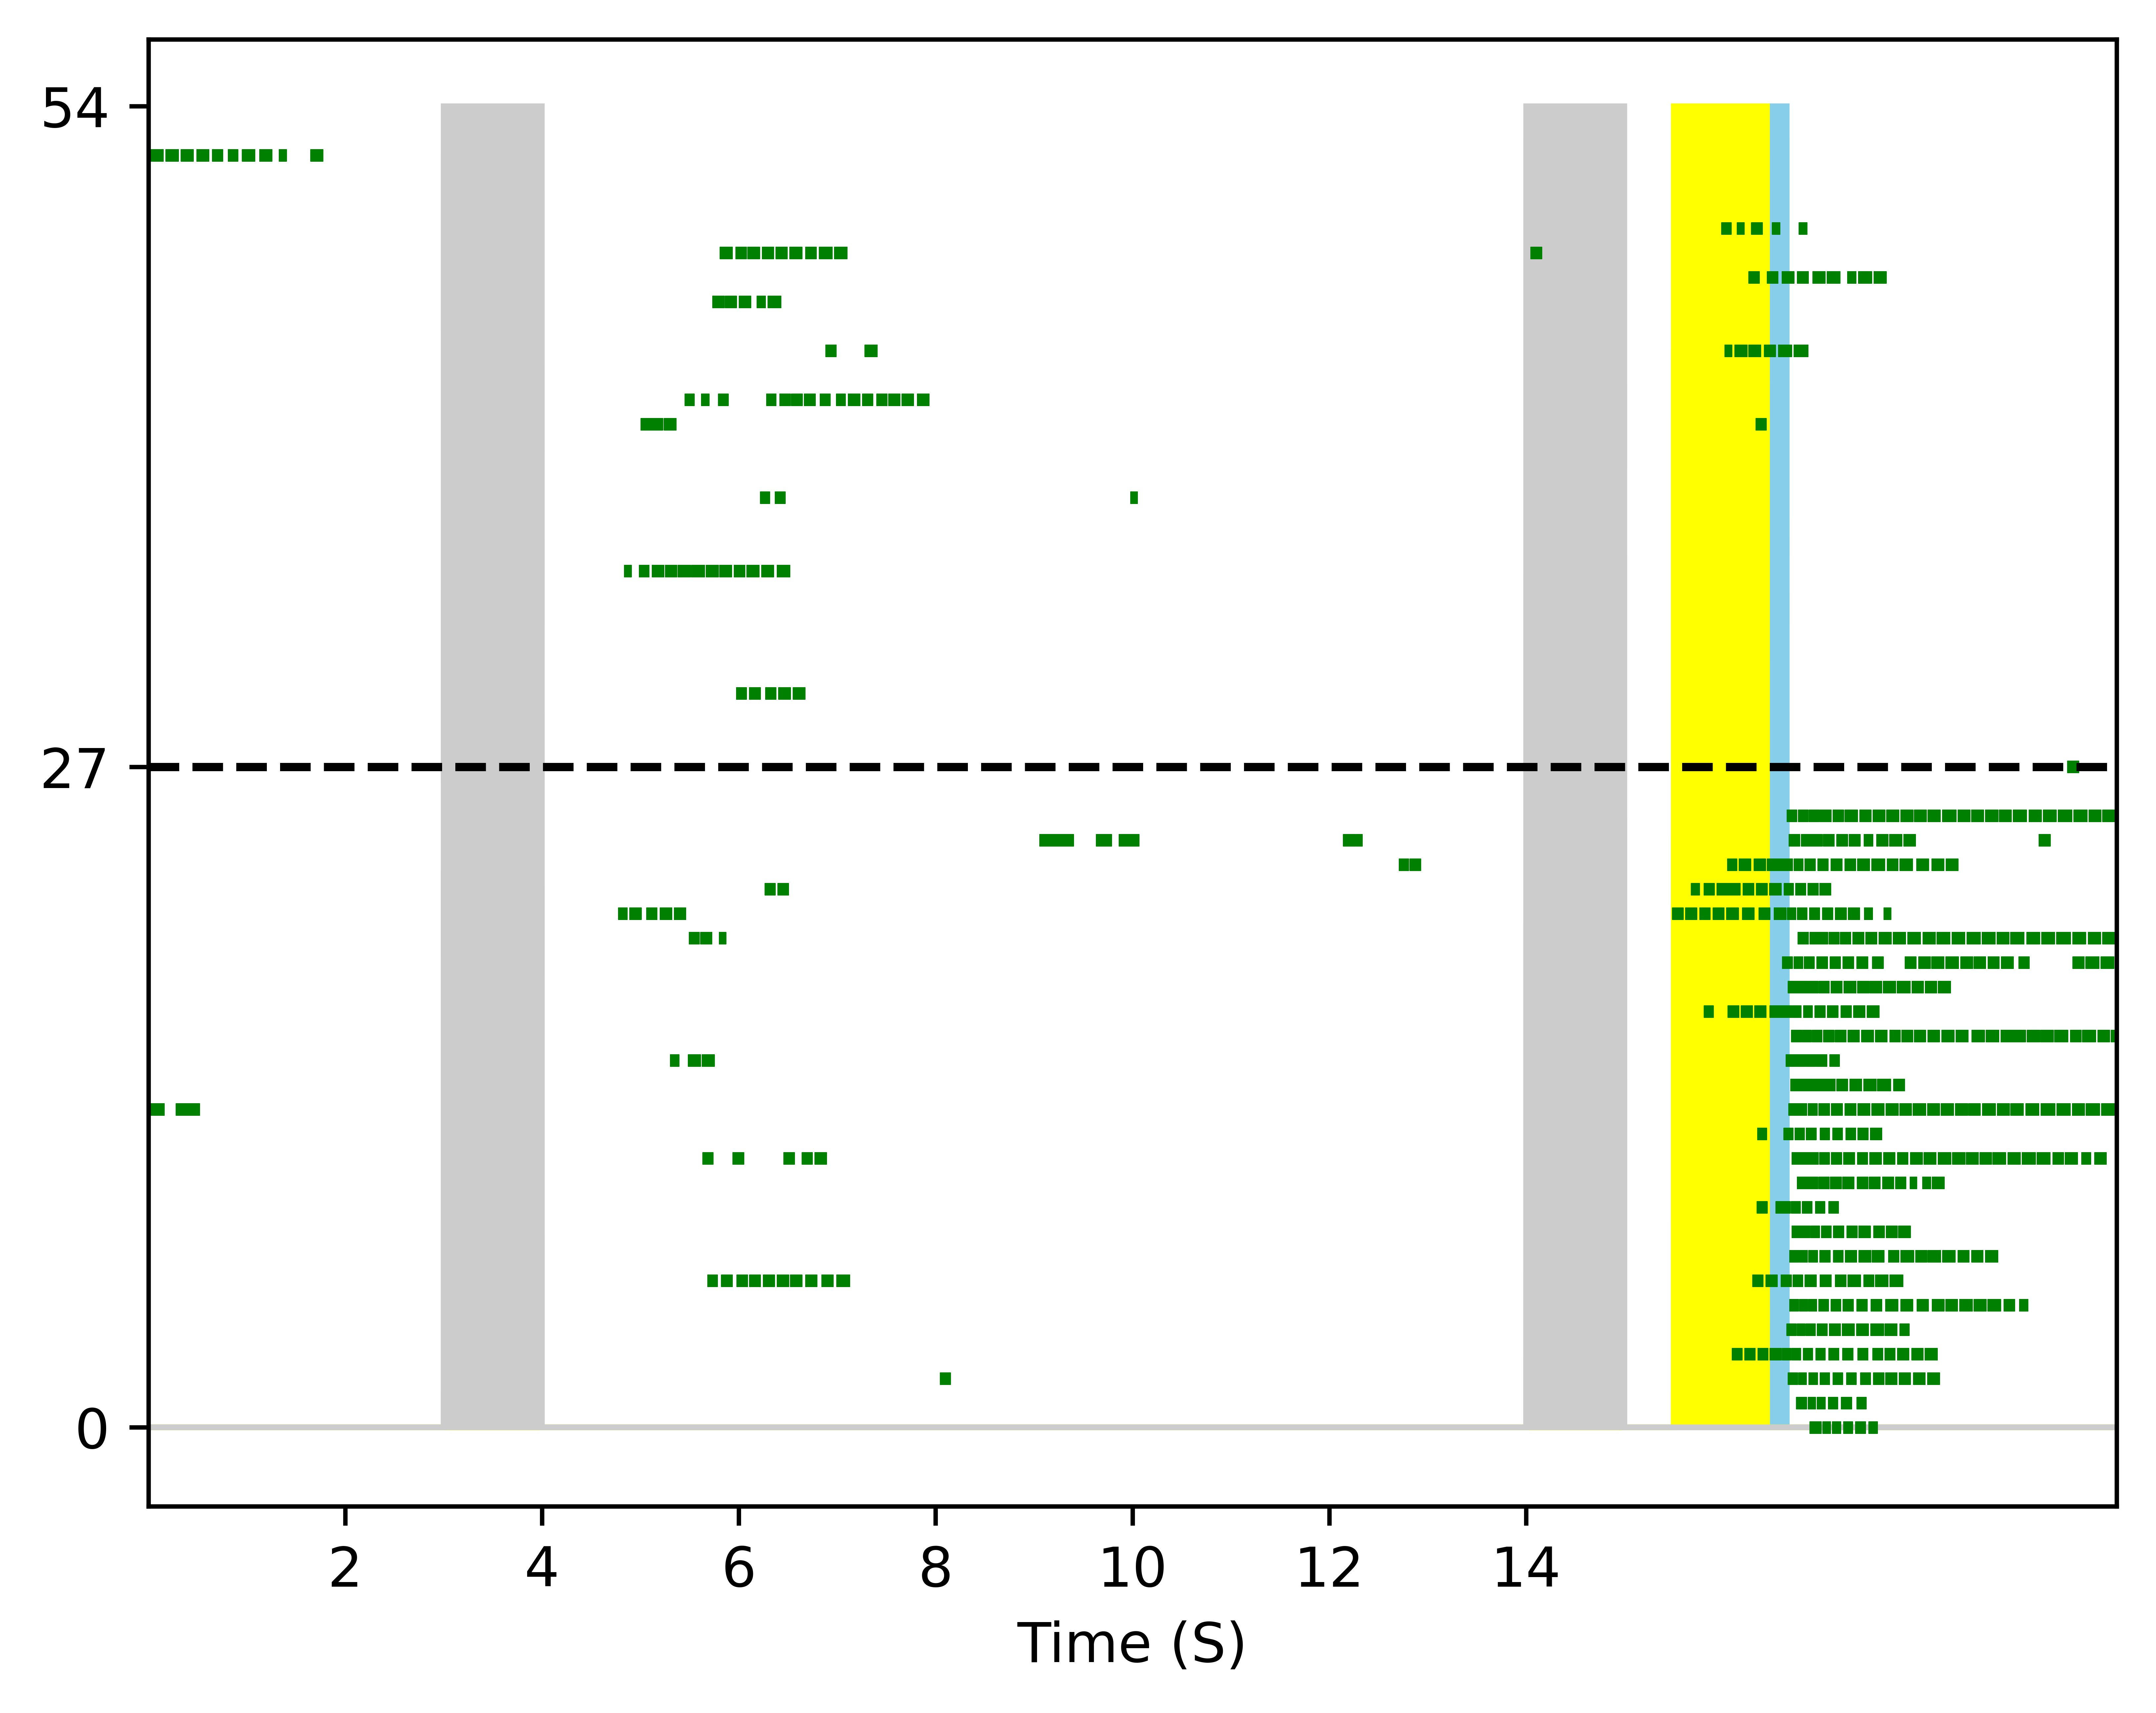

In [19]:
# Lick raster plot for mouse+day session
# plots lick times on each trial (rows) seperated by go trials (bottom) and no-go trials (top)

mouse = 'DO50'
day = 12
delay = 10000

# offset sets spacing between trial rasters
offset = 2

temp_data = task_data[(task_data.mouse == mouse)&(task_data.day == day)]

plot_height = len(temp_data)*offset

lick_times_go = (temp_data[(temp_data.go_nogo == 'go')])['lick_times']
lick_times_nogo = (temp_data[(temp_data.go_nogo == 'no_go')])['lick_times']
lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

plt.figure(dpi=100)
plt.eventplot(lick_times_go_nogo,linewidths=1,lineoffsets=2,colors='g')
plt.xlim(0,delay+10000)
#plt.xlim(delay+6500,delay+7450)

water_template = np.zeros(delay+10000)
#water_template[delay+7500:delay+7650:] = plt.ylim()[
water_template[delay+6500:delay+6650] = plot_height
plt.fill(water_template, color = 'skyblue')

go_nogo_template = np.zeros(delay+10000)
#go_nogo_template[delay+6500:delay+7450] = plt.ylim()[1]
go_nogo_template[delay+5500:delay+6450] = plot_height
plt.fill(go_nogo_template, color = 'yellow')

odour_template = np.zeros(delay+10000)
#odour_template[4000:5000] = plt.ylim()[1]
odour_template[3000:4000] = plot_height
#odour_template[delay+5000:delay+6000] = plt.ylim()[1]
odour_template[delay+4000:delay+5000] = plot_height
plt.fill(odour_template, color = '0.8')

plt.yticks([0, len(lick_times_go)*offset ,len(temp_data)*offset],[0, len(lick_times_go), len(temp_data)]);
plt.xticks([2000,4000,6000,8000,10000,12000,14000],[2,4,6,8,10,12,14]);
plt.axhline(y = len(lick_times_go)*offset, c = 'k', linestyle = '--')
plt.xlabel('Time (S)');
#plt.savefig('example_expert_raster_DO3_day6.pdf', bbox_inches='tight')
plt.show()

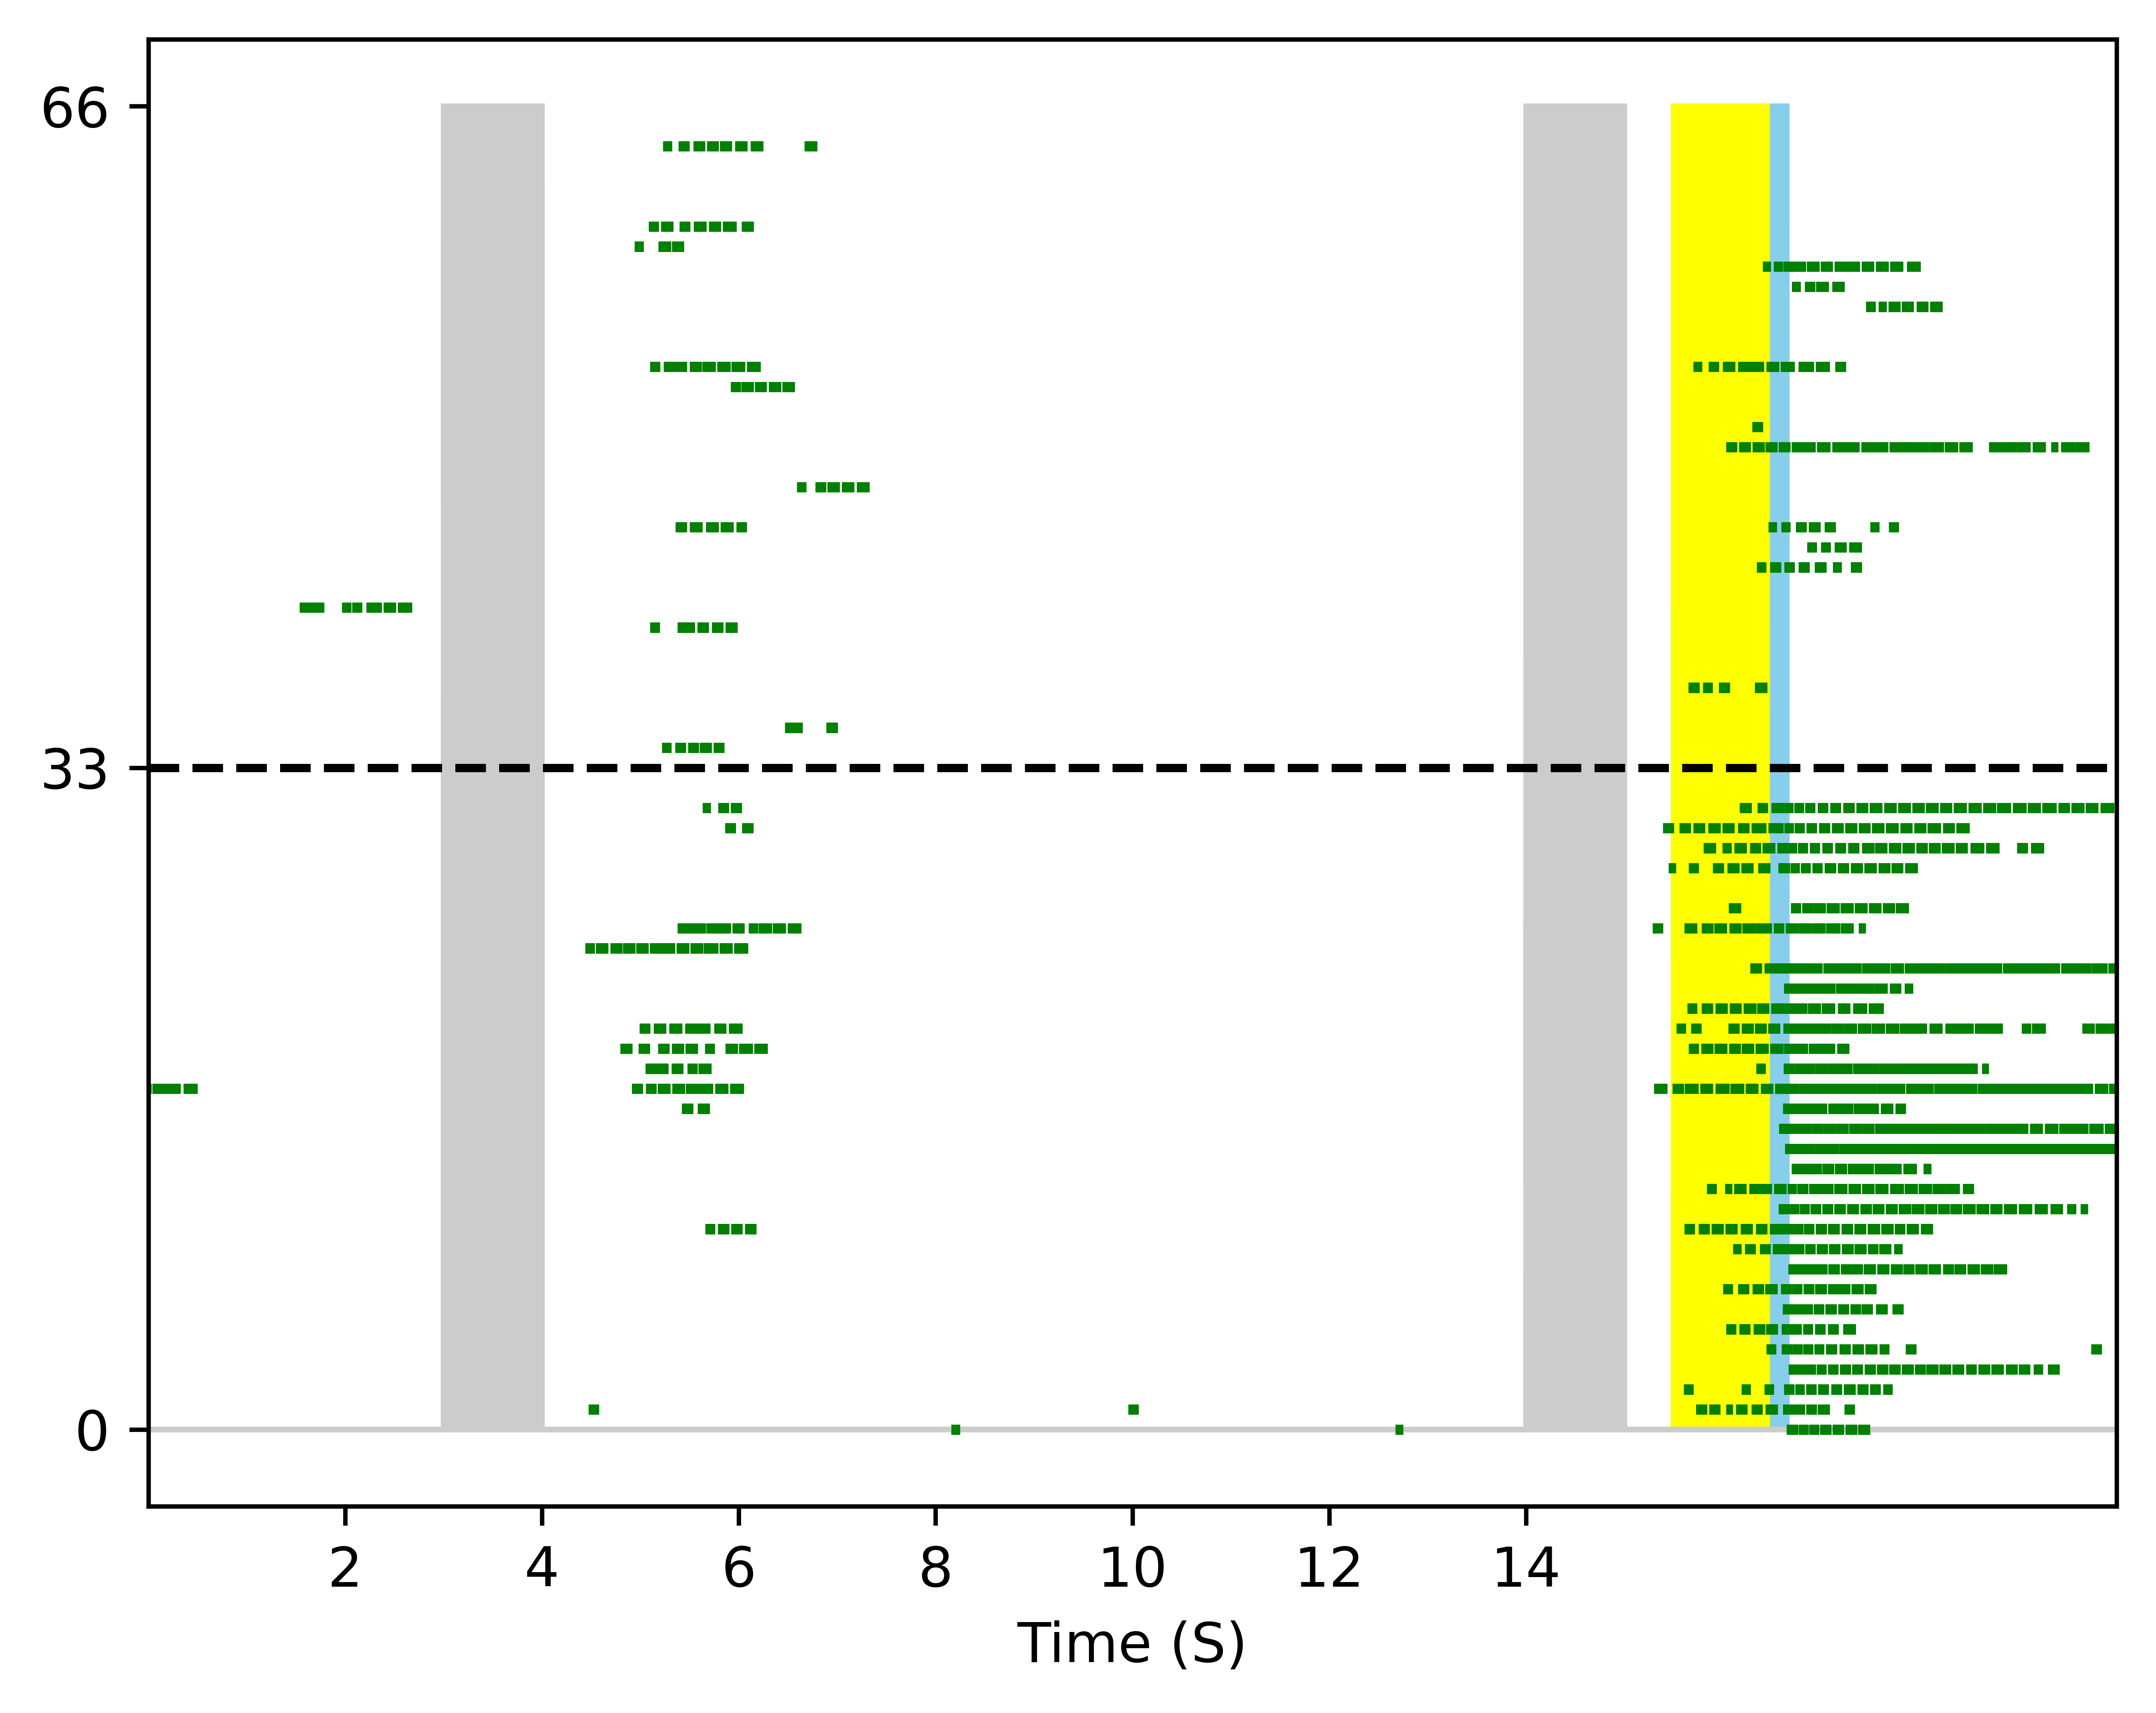

In [20]:
# Lick raster plot for mouse+day session
# plots lick times on each trial (rows) seperated by go trials (bottom) and no-go trials (top)

mouse = 'DO50'
day = 13
delay = 10000

# offset sets spacing between trial rasters
offset = 2

temp_data = task_data[(task_data.mouse == mouse)&(task_data.day == day)]

plot_height = len(temp_data)*offset

lick_times_go = (temp_data[(temp_data.go_nogo == 'go')])['lick_times']
lick_times_nogo = (temp_data[(temp_data.go_nogo == 'no_go')])['lick_times']
lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

plt.figure(dpi=100)
plt.eventplot(lick_times_go_nogo,linewidths=1,lineoffsets=2,colors='g')
plt.xlim(0,delay+10000)
#plt.xlim(delay+6500,delay+7450)

water_template = np.zeros(delay+10000)
#water_template[delay+7500:delay+7650:] = plt.ylim()[
water_template[delay+6500:delay+6650] = plot_height
plt.fill(water_template, color = 'skyblue')

go_nogo_template = np.zeros(delay+10000)
#go_nogo_template[delay+6500:delay+7450] = plt.ylim()[1]
go_nogo_template[delay+5500:delay+6450] = plot_height
plt.fill(go_nogo_template, color = 'yellow')

odour_template = np.zeros(delay+10000)
#odour_template[4000:5000] = plt.ylim()[1]
odour_template[3000:4000] = plot_height
#odour_template[delay+5000:delay+6000] = plt.ylim()[1]
odour_template[delay+4000:delay+5000] = plot_height
plt.fill(odour_template, color = '0.8')

plt.yticks([0, len(lick_times_go)*offset ,len(temp_data)*offset],[0, len(lick_times_go), len(temp_data)]);
plt.xticks([2000,4000,6000,8000,10000,12000,14000],[2,4,6,8,10,12,14]);
plt.axhline(y = len(lick_times_go)*offset, c = 'k', linestyle = '--')
plt.xlabel('Time (S)');
#plt.savefig('example_expert_raster_DO3_day6.pdf', bbox_inches='tight')
plt.show()

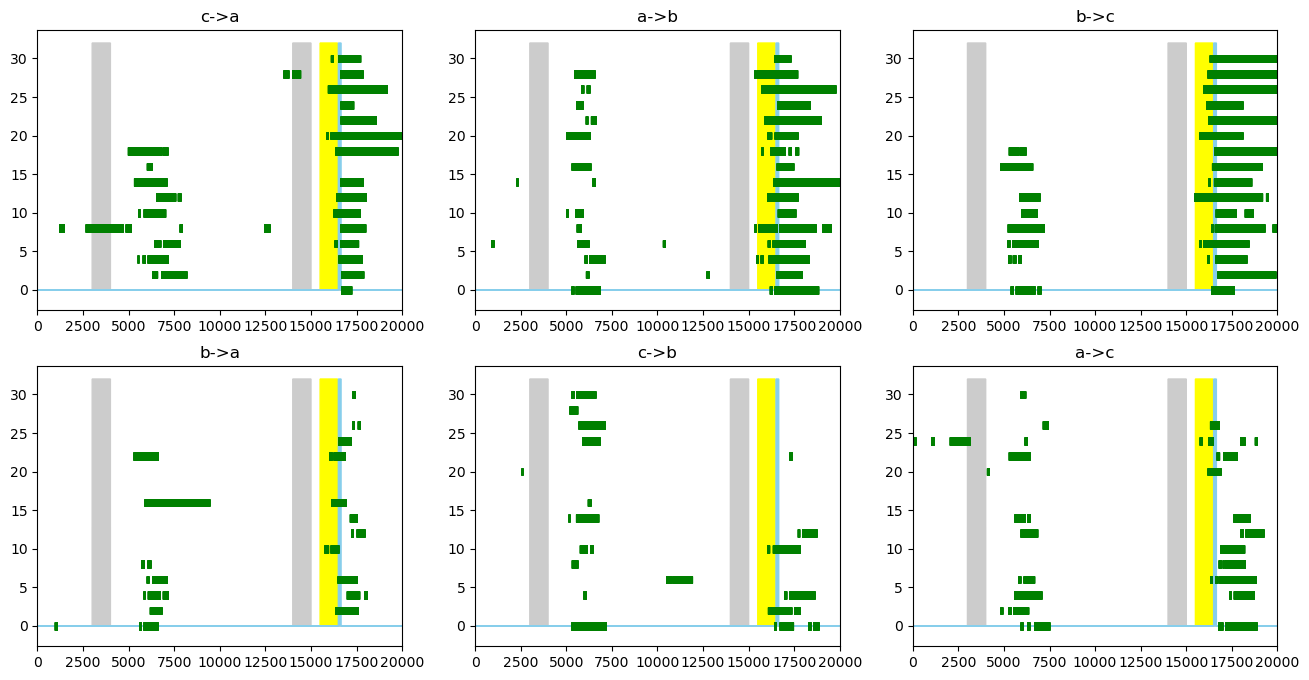

In [17]:
mouse = 'DO50'
day = 
offset = 2
delay = 10000

temp_data = task_data[(task_data.mouse == mouse)&(task_data.day == day)]

trial_types = ['c->a', 'a->b', 'b->c', 'b->a', 'c->b', 'a->c']

plt.figure(figsize=(16, 8))           
for i,j in enumerate (trial_types):
    plot_height = len(temp_data[temp_data.trial_type == j]) * offset
    plt.subplot(231+i)
    plt.eventplot((temp_data[(temp_data.trial_type == j)])['lick_times'],linewidths=1,colors='g', lineoffsets = offset)
    plt.xlim(0,delay+10000)
    #plt.xlim(delay+6500,delay+7450)
    plt.gca().set_title(j)

    go_nogo_template = np.zeros(delay+10000)
    go_nogo_template[delay+5500:delay+6450] = plot_height
    plt.fill(go_nogo_template, color = 'yellow')

    odour_template = np.zeros(delay+10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay+4000:delay+5000] = plot_height
    plt.fill(odour_template, color = '0.8')
    
    water_template = np.zeros(delay+10000)
    water_template[delay+6500:delay+6650:] = plot_height
    plt.fill(water_template, color = 'skyblue')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14,) + inhomogeneous part.

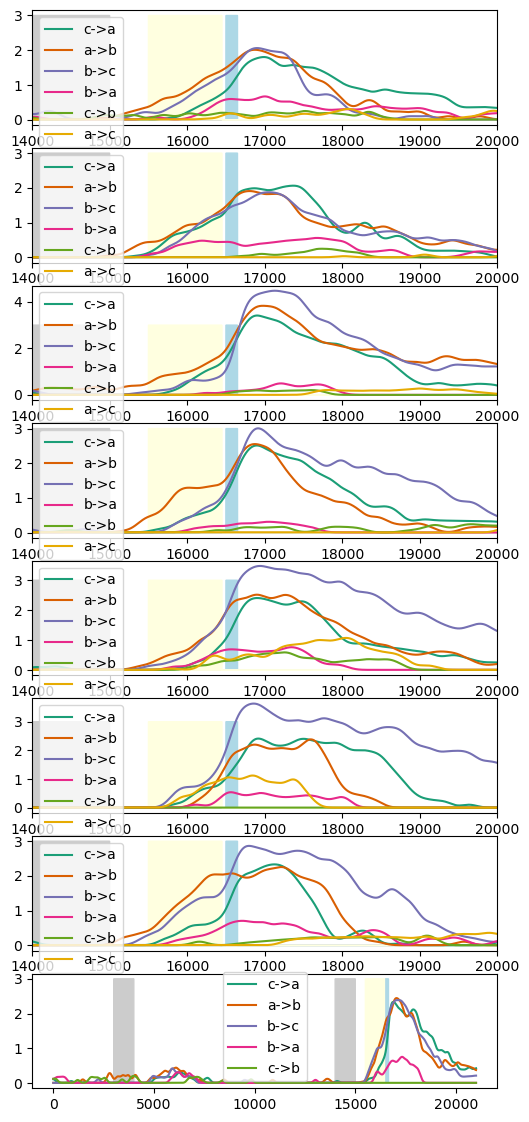

In [6]:
block_lim = 60
sigma = 100
days = [3,4,5,6,7,8,9,10]
mouse = 'DO50'
delay = 5000

plot_height = 3

sns.set_palette("Dark2")

plt.figure(figsize=(6, 14)) 
for i,j in enumerate (days):
    temp_data = task_data[(task_data.day == j)&(task_data.block < block_lim)&(task_data.mouse == mouse)]
    plt.subplot(len(days), 1, 1+i)
    water_template = np.zeros(delay+10000)
    water_template[delay+6500:delay+6650] = plot_height
    plt.fill(water_template, color = 'lightblue')
    odour_template = np.zeros(delay+10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay+4000:delay+5000] = plot_height
    plt.fill(odour_template, color = '0.8')
    go_nogo_template = np.zeros(delay+10000)
    go_nogo_template[delay+5500:delay+6450] = plot_height
    plt.fill(go_nogo_template, color = 'lightyellow')
                          
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->a')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->b')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->c')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->a')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->b')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->c')
    
    plt.legend(loc="upper left")
    plt.xlim(0,20000)

(0.0, 3.0)

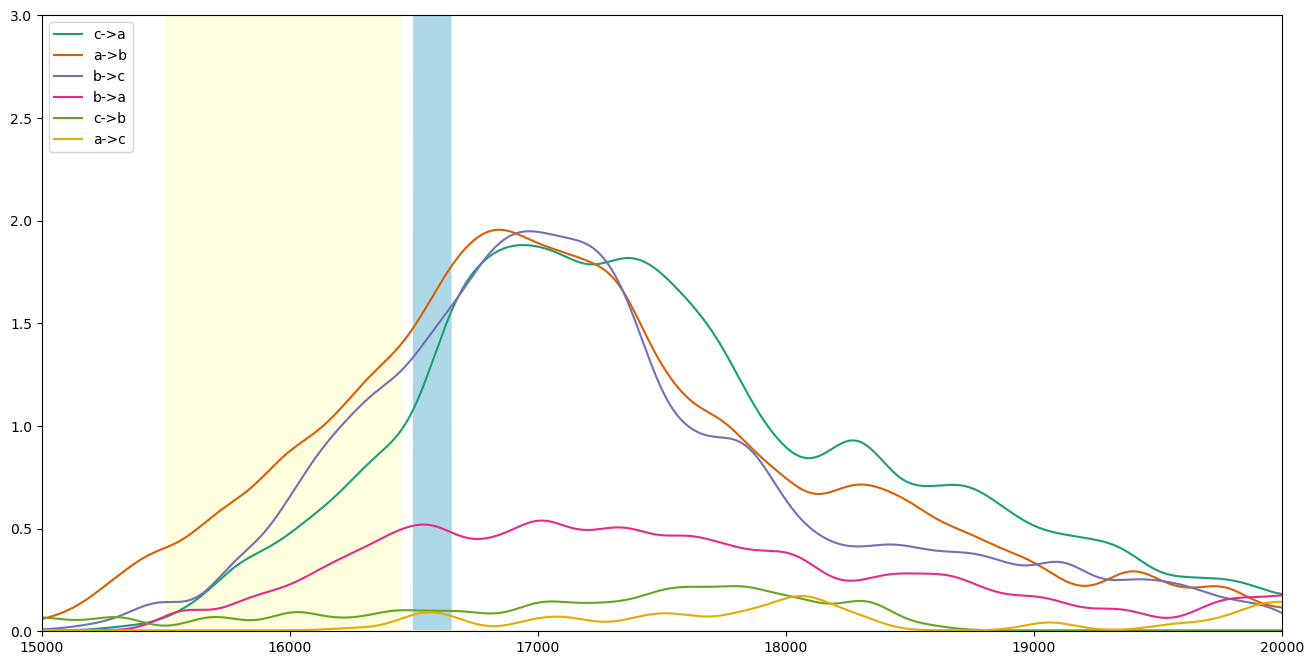

In [9]:
block_lim = 60
sigma = 100
days = [3,4]
mouse = 'DO50'
delay = 10000
plot_height = 3

plt.figure(figsize=(16, 8)) 
plt.plot
temp_data = task_data[(task_data.mouse == mouse)&(task_data.day.isin(days))&(task_data.block < block_lim)]
water_template = np.zeros(delay+10000)
water_template[delay+6500:delay+6650] = plot_height
plt.fill(water_template, color = 'lightblue')
odour_template = np.zeros(delay+10000)
odour_template[3000:4000] = plot_height
odour_template[delay+4000:delay+5000] = plot_height
plt.fill(odour_template, color = '0.8')
go_nogo_template = np.zeros(delay+10000)
go_nogo_template[delay+5500:delay+6450] = plot_height
plt.fill(go_nogo_template, color = 'lightyellow')

plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->a')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->b')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->c')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->a')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->b')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->c')

plt.legend(loc="upper left")        
plt.xlim(15000,20000)
plt.ylim(0,plot_height)
    
#plt.savefig('C-A_value_base_task_DO26_DO36_DO37_preempt_lick_zoom')

(0.0, 4.0)

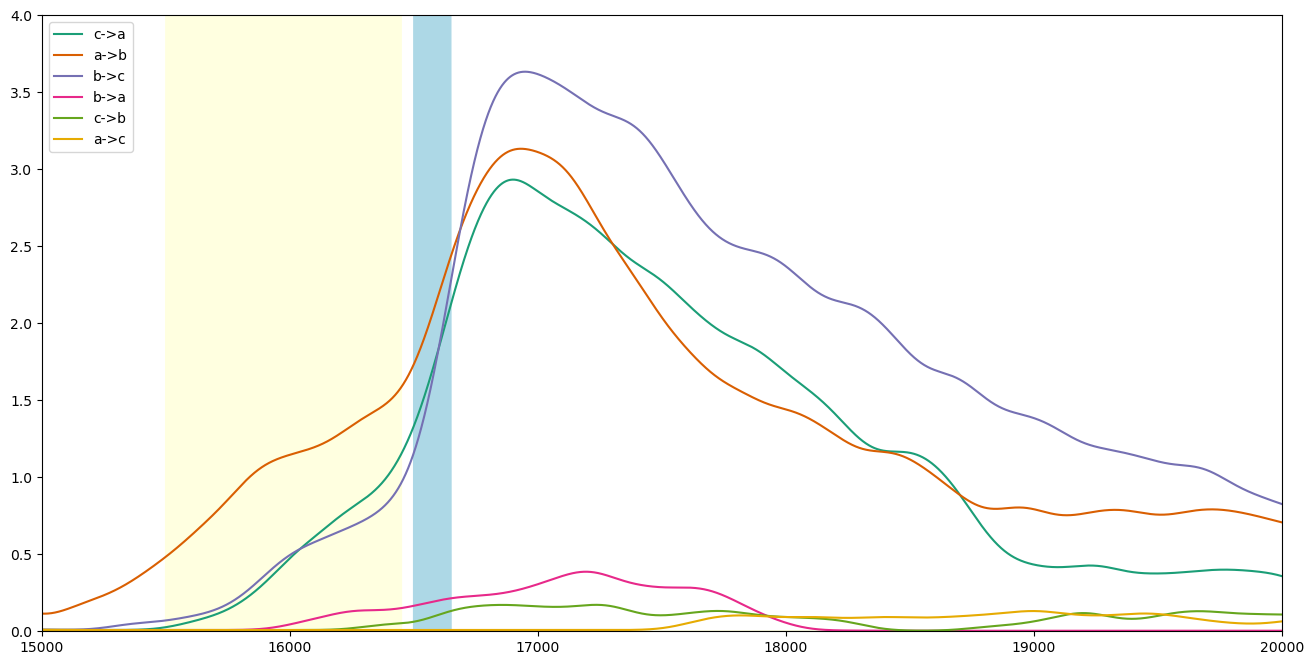

In [14]:
block_lim = 60
sigma = 100
days = [5,6]
mouse = 'DO50'
delay = 10000
plot_height = 4

plt.figure(figsize=(16, 8)) 
plt.plot
temp_data = task_data[(task_data.mouse == mouse)&(task_data.day.isin(days))&(task_data.block < block_lim)]
water_template = np.zeros(delay+10000)
water_template[delay+6500:delay+6650] = plot_height
plt.fill(water_template, color = 'lightblue')
odour_template = np.zeros(delay+10000)
odour_template[3000:4000] = plot_height
odour_template[delay+4000:delay+5000] = plot_height
plt.fill(odour_template, color = '0.8')
go_nogo_template = np.zeros(delay+10000)
go_nogo_template[delay+5500:delay+6450] = plot_height
plt.fill(go_nogo_template, color = 'lightyellow')

plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->a')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->b')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->c')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->a')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->b')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->c')

plt.legend(loc="upper left")        
plt.xlim(15000,20000)
plt.ylim(0,plot_height)
    
#plt.savefig('C-A_value_base_task_DO26_DO36_DO37_preempt_lick_zoom')

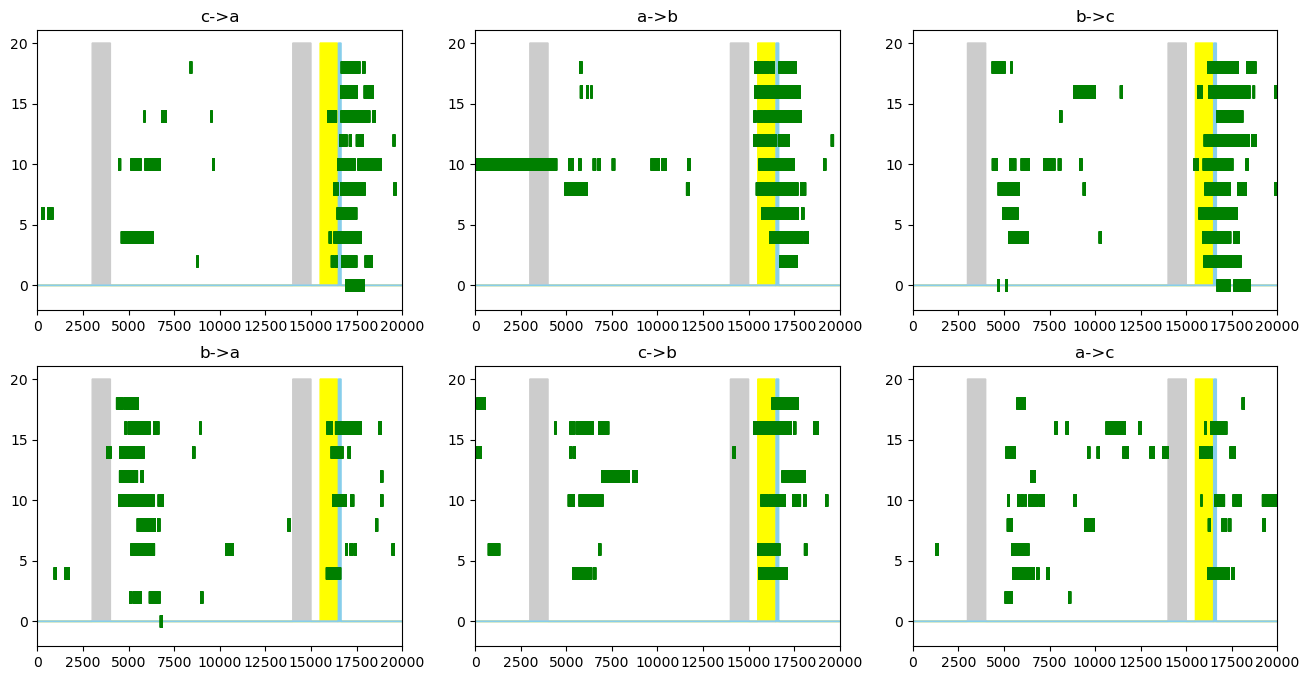

In [13]:
mouse = 'DO50'
day = 1
offset = 2
delay = 10000

temp_data = task_data[(task_data.mouse == mouse)&(task_data.day == day)]

trial_types = ['c->a', 'a->b', 'b->c', 'b->a', 'c->b', 'a->c']

plt.figure(figsize=(16, 8))           
for i,j in enumerate (trial_types):
    plot_height = len(temp_data[temp_data.trial_type == j]) * offset
    plt.subplot(231+i)
    plt.eventplot((temp_data[(temp_data.trial_type == j)])['lick_times'],linewidths=1,colors='g', lineoffsets = offset)
    plt.xlim(0,delay+10000)
    #plt.xlim(delay+6500,delay+7450)
    plt.gca().set_title(j)

    go_nogo_template = np.zeros(delay+10000)
    go_nogo_template[delay+5500:delay+6450] = plot_height
    plt.fill(go_nogo_template, color = 'yellow')

    odour_template = np.zeros(delay+10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay+4000:delay+5000] = plot_height
    plt.fill(odour_template, color = '0.8')
    
    water_template = np.zeros(delay+10000)
    water_template[delay+6500:delay+6650:] = plot_height
    plt.fill(water_template, color = 'skyblue')

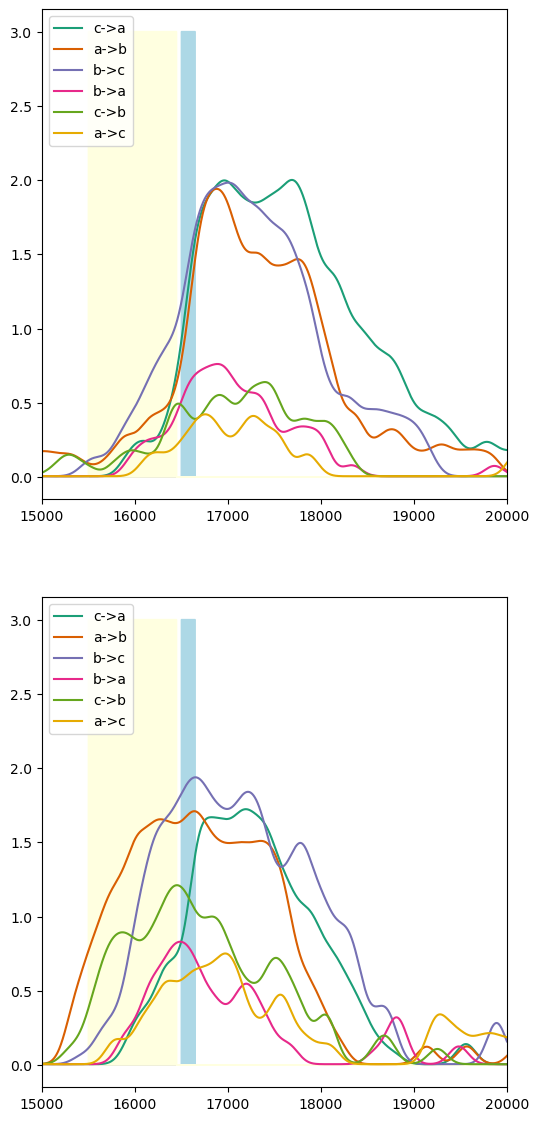

In [14]:
block_lim = 60
sigma = 100
days = [0,1]
mouse = 'DO50'
delay = 10000

plot_height = 3

sns.set_palette("Dark2")

plt.figure(figsize=(6, 14)) 
for i,j in enumerate (days):
    temp_data = task_data[(task_data.day == j)&(task_data.block < block_lim)&(task_data.mouse == mouse)]
    plt.subplot(len(days), 1, 1+i)
    water_template = np.zeros(delay+10000)
    water_template[delay+6500:delay+6650] = plot_height
    plt.fill(water_template, color = 'lightblue')
    odour_template = np.zeros(delay+10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay+4000:delay+5000] = plot_height
    plt.fill(odour_template, color = '0.8')
    go_nogo_template = np.zeros(delay+10000)
    go_nogo_template[delay+5500:delay+6450] = plot_height
    plt.fill(go_nogo_template, color = 'lightyellow')
                          
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->a')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->b')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->c')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->a')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->b')
    sns.lineplot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->c')
    
    plt.legend(loc="upper left")
    plt.xlim(15000,20000)

(0.0, 3.0)

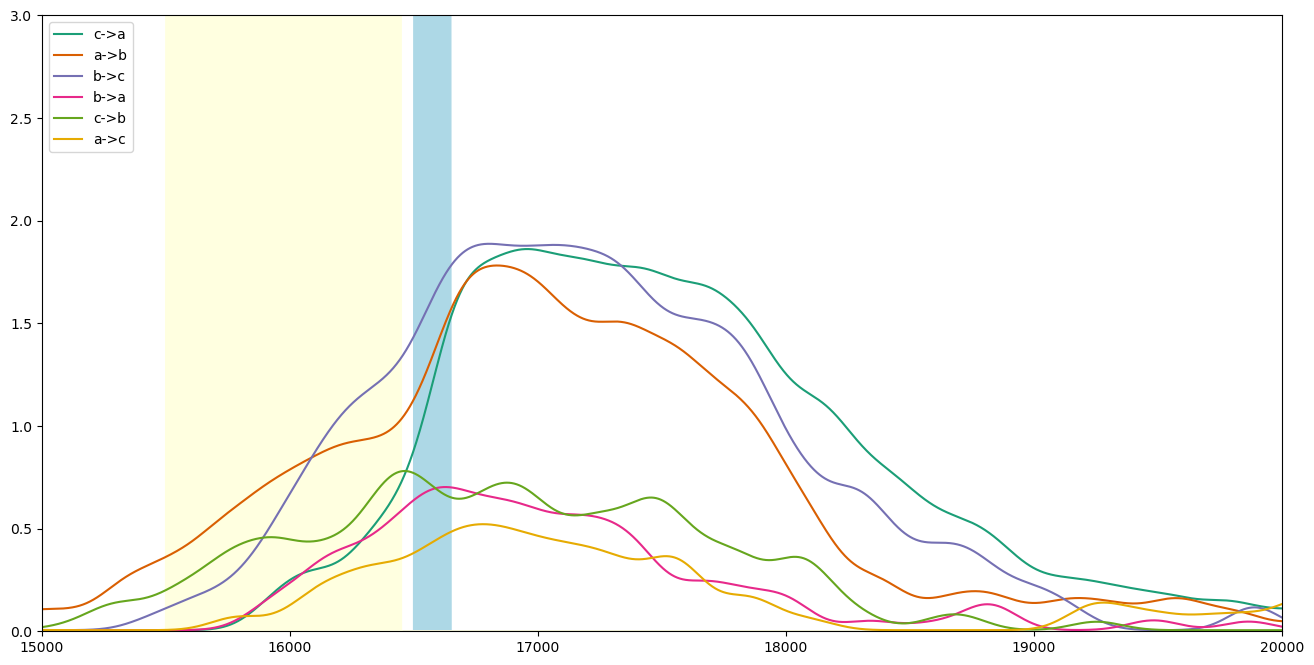

In [16]:
block_lim = 60
sigma = 100
days = [0,1]
mouse = 'DO50'
delay = 10000

plt.figure(figsize=(16, 8)) 
plt.plot
temp_data = task_data[(task_data.mouse == mouse)&(task_data.day.isin(days))&(task_data.block < block_lim)]
water_template = np.zeros(delay+10000)
water_template[delay+6500:delay+6650] = plot_height
plt.fill(water_template, color = 'lightblue')
odour_template = np.zeros(delay+10000)
odour_template[3000:4000] = plot_height
odour_template[delay+4000:delay+5000] = plot_height
plt.fill(odour_template, color = '0.8')
go_nogo_template = np.zeros(delay+10000)
go_nogo_template[delay+5500:delay+6450] = plot_height
plt.fill(go_nogo_template, color = 'lightyellow')

plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->a')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->b')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->c')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'b->a'].lick_data.values.tolist(), axis = 0), sigma),label = 'b->a')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'c->b'].lick_data.values.tolist(), axis = 0), sigma),label = 'c->b')
plt.plot(scipy.ndimage.gaussian_filter1d(np.mean(temp_data[temp_data.trial_type == 'a->c'].lick_data.values.tolist(), axis = 0), sigma),label = 'a->c')

plt.legend(loc="upper left")        
plt.xlim(15000,20000)
plt.ylim(0,plot_height)
    
#plt.savefig('C-A_value_base_task_DO26_DO36_DO37_preempt_lick_zoom')